<a href="https://colab.research.google.com/github/kyungin26/ITB2022/blob/main/ITB_2110799_%EC%B5%9C%EA%B2%BD%EC%9D%B8_classification_dt_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import mglearn
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGo

In [ ]:
path = '/content/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


#데이터 준비 및 탐색




'식전혈당(공복혈당)' 열에서 200 이하의 값은 '0'으로 표시하고 200을 초과하는 값은 '1'로 표시하여 '당뇨위험'이라는 제목의 열을 추가하였다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
health = pd.read_csv("/content/health_data_all.csv", index_col='가입자일련번호')

print(health.columns)
display(health.info())
display(health.head())

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '당뇨위험',
       '식전혈당(공복혈당)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9859 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         9859 non-null   int64  
 1   연령대코드(5세단위)  9859 non-null   int64  
 2   신장(5Cm단위)    9859 non-null   int64  
 3   체중(5Kg 단위)   9859 non-null   int64  
 4   허리둘레         9859 non-null   float64
 5   시력(좌)        9859 non-null   float64
 6   시력(우)        9859 non-null   float64
 7   청력(좌)        9859 non-null   int64  
 8   청력(우)        9859 non-null   int64  
 9   수축기혈압        9859 non-null   int64  
 10  이완기혈압        9859 non-null   int64  
 11  혈색소          9859 non-null   float64
 12  요단백          9859 non-nu

None

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,당뇨위험,식전혈당(공복혈당)
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,0,9,165,60,72.1,1.2,1.5,1,1,127,...,1,1.1,21,27,21,0,0,0,0,90
2,1,13,150,65,81.0,0.8,0.8,1,1,110,...,1,0.5,18,15,15,0,0,0,0,87
3,1,12,155,55,70.0,0.6,0.7,1,1,123,...,1,0.7,27,25,7,0,0,0,0,102
4,0,13,160,70,90.8,1.0,1.0,1,2,134,...,1,1.2,65,97,72,0,0,1,0,146
5,1,12,155,50,75.2,1.5,1.2,1,1,144,...,1,0.7,18,17,14,0,0,0,0,110


In [ ]:
health.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,당뇨위험,식전혈당(공복혈당)
count,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,...,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000
mean,0.484836,11.890151,161.068567,63.121513,82.347500,0.936819,0.937194,1.049498,1.043615,124.668222,...,1.119485,0.847284,27.600264,26.818237,38.141901,0.573080,0.586774,0.328329,0.010549,103.796734
std,0.499795,2.137731,9.182543,12.208294,9.552327,0.658613,0.618104,0.225627,0.213950,14.622218,...,0.489828,0.293926,17.917298,23.783894,58.316064,0.795612,0.492438,0.469629,0.102169,24.676509
min,0.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,1.000000,0.050000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,0.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,91.000000
50%,0.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,1.000000,0.000000,0.000000,99.000000
75%,1.000000,13.000000,170.000000,70.000000,88.800000,1.200000,1.200000,1.000000,1.000000,134.000000,...,1.000000,1.000000,30.000000,31.000000,39.000000,1.000000,1.000000,1.000000,0.000000,109.000000
max,1.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,...,6.000000,9.200000,692.000000,1146.000000,2322.000000,2.000000,1.000000,1.000000,1.000000,473.000000


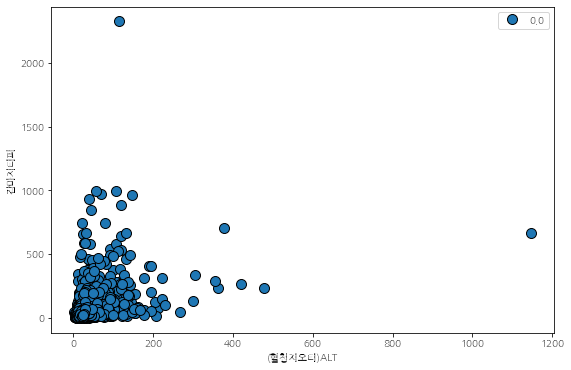

In [330]:
fm._rebuild()

mglearn.discrete_scatter(health['(혈청지오티)ALT'], health['감마지티피'])
plt.xlabel('(혈청지오티)ALT')
plt.ylabel('감마지티피')
plt.legend()
plt.show()

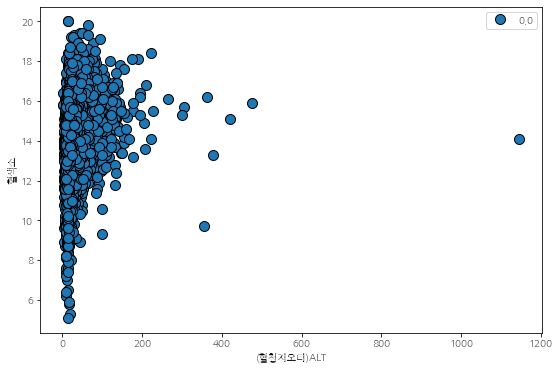

In [331]:
fm._rebuild()

mglearn.discrete_scatter(health['(혈청지오티)ALT'], health['혈색소'])
plt.xlabel('(혈청지오티)ALT')
plt.ylabel('혈색소')
plt.legend()
plt.show()

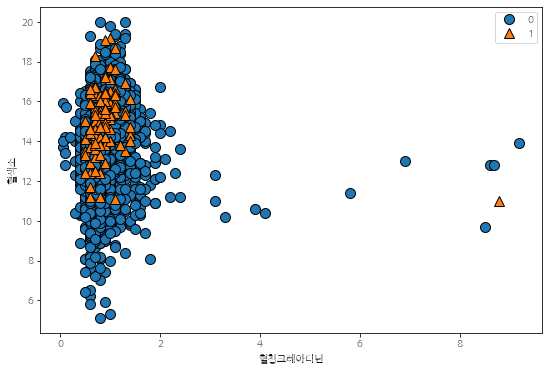

In [ ]:
fm._rebuild()

mglearn.discrete_scatter(health['혈청크레아티닌'], health['혈색소'], health['당뇨위험'])
plt.xlabel('혈청크레아티닌')
plt.ylabel('혈색소')
plt.legend()
plt.show()

데이터를 당뇨위험도가 '양호'인 경우와 '위험'인 경우로 분류한다.



#의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X = health.iloc[:, 0:19]
y = health.iloc[:, 20]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.975


In [ ]:
tree = DecisionTreeClassifier(min_samples_split=10, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.993
시험용 데이터 정확도: 0.984


In [ ]:
tree = DecisionTreeClassifier(min_samples_split=20, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.991
시험용 데이터 정확도: 0.988


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.992
시험용 데이터 정확도: 0.989


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.990
시험용 데이터 정확도: 0.990


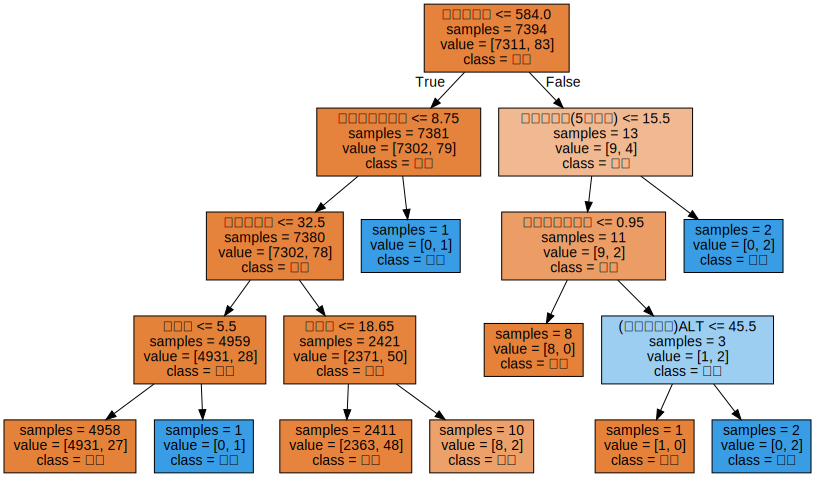

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "양호", "위험"],
                feature_names=health.columns[0:19], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.17240528 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04915404
 0.15050155 0.29653805 0.         0.10145661 0.22994448 0.
 0.        ]


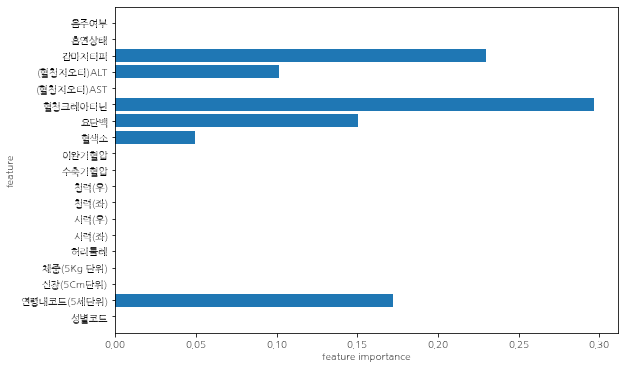

In [ ]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[0:19])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[0:19])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_health(tree)

In [ ]:
res = pd.DataFrame(result)
res["name"] = health.columns[0:19]
display(res.info())

display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19 non-null     float64
 1   name    19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


None

,0,name
15,0.060448,(혈청지오티)ALT
14,0.078210,(혈청지오티)AST
16,0.075609,감마지티피
0,0.006014,성별코드
9,0.069565,수축기혈압
6,0.075417,시력(우)
5,0.019478,시력(좌)
2,0.028292,신장(5Cm단위)
1,0.067140,연령대코드(5세단위)
12,0.035789,요단백


#랜덤 포레스트

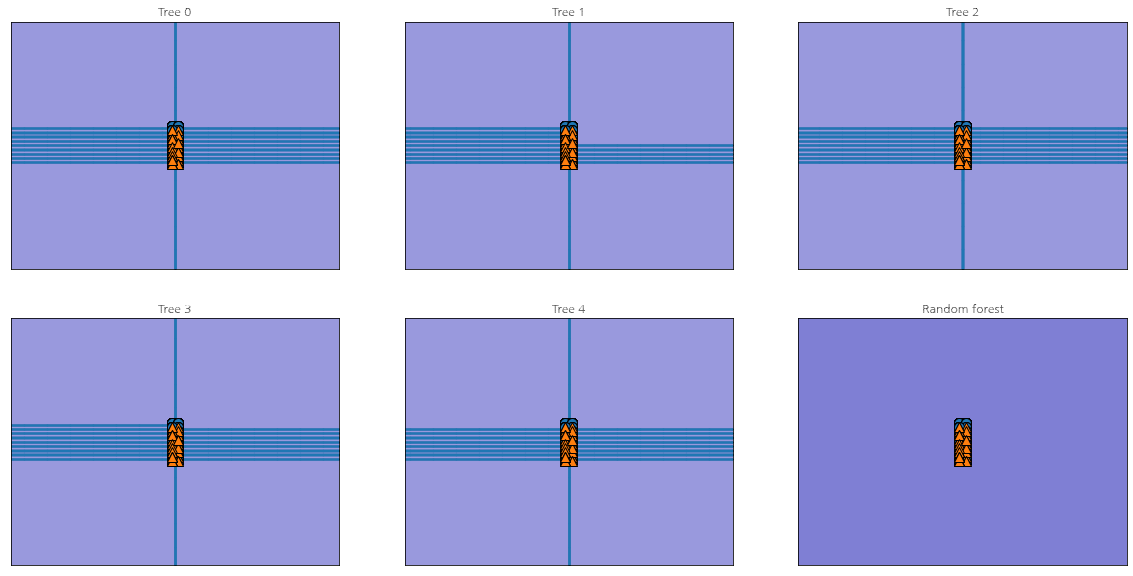

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=5)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:20].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:20].values, fill=True, ax=axes[-1, -1], alpha=.5)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.991


In [ ]:
forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.989
시험용 데이터 세트 정확도: 0.991


In [ ]:
forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
forest = RandomForestClassifier(max_depth=4, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.989
시험용 데이터 세트 정확도: 0.991


In [ ]:
forest = RandomForestClassifier(n_estimators=200, random_state=5)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.991


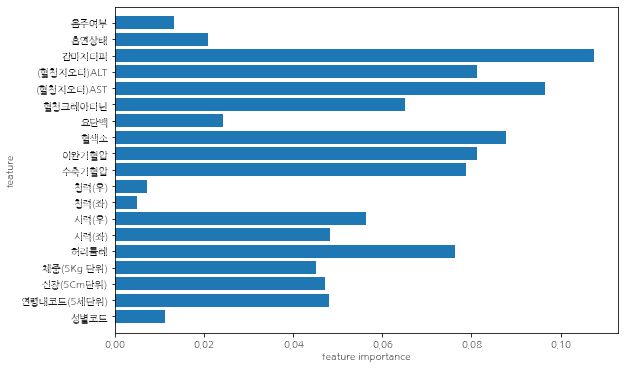

In [ ]:
plot_feature_importances_health(forest)

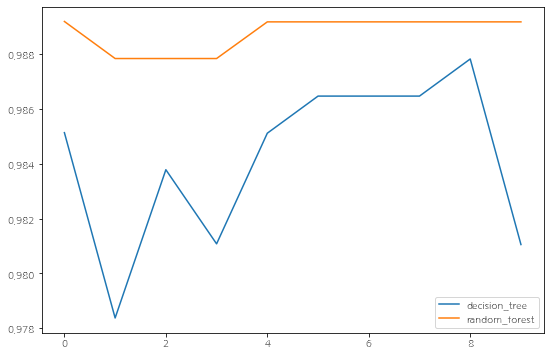

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

#그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.993
시험용 데이터 세트 정확도: 0.987


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.996
시험용 데이터 세트 정확도: 0.988


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.993
시험용 데이터 세트 정확도: 0.987


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.991
시험용 데이터 세트 정확도: 0.989


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.993
시험용 데이터 세트 정확도: 0.987


In [ ]:
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.993
시험용 데이터 세트 정확도: 0.988


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.989
시험용 데이터 세트 정확도: 0.991


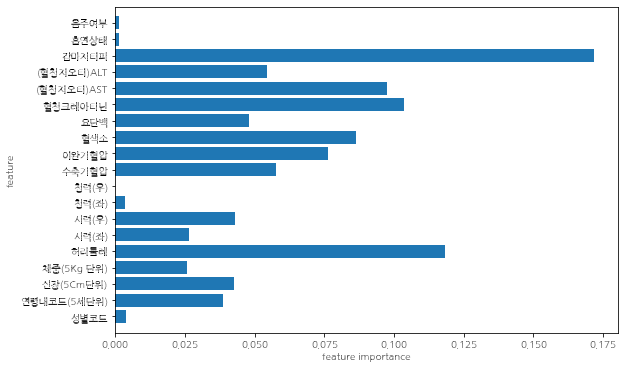

In [ ]:
plot_feature_importances_health(gbrt)

교차 검증

In [ ]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.98918919 0.98783784 0.98783784 0.98513514 0.9864682  0.98917456
 0.98782138 0.98917456 0.98782138 0.98917456]
Random forest:  [0.98918919 0.98783784 0.98783784 0.98783784 0.98917456 0.98917456
 0.98917456 0.98917456 0.98917456 0.98917456]
Gradient boosting:  [0.98918919 0.98783784 0.98783784 0.98783784 0.98917456 0.98917456
 0.98782138 0.98917456 0.98917456 0.98917456]
Accuracy mean
Decision tree :0.988
Random forest :0.989
Gradient boosting :0.989


In [353]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.988
Random forest :0.989
Gradient boosting :0.989


#모델 평가

정오 분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts())

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    2444
1      21
Name: 당뇨위험, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.989
[[2437    7]
 [  20    1]]
Random forest 시험용 데이터 세트 정확도:0.991
[[2444    0]
 [  21    0]]
Gradient boosting 시험용 데이터 세트 정확도:0.991
[[2444    0]
 [  21    0]]


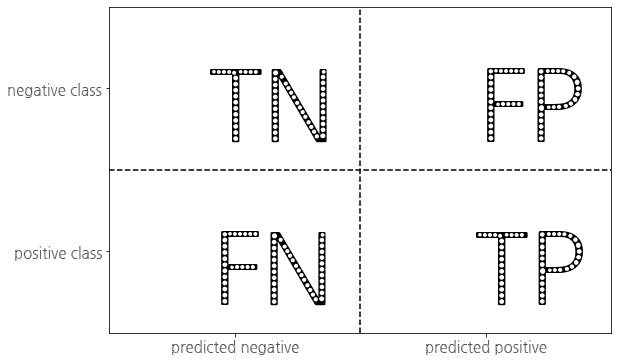

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [352]:
from sklearn.metrics import classification_report

print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["양호", "위험"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["양호", "위험"]))
print("Gradient Boosting:")
print(classification_report(y_test, gbrt_pred, target_names=["양호", "위험"]))

Decision Tree:
              precision    recall  f1-score   support

          양호       0.99      1.00      0.99      2444
          위험       0.12      0.05      0.07        21

    accuracy                           0.99      2465
   macro avg       0.56      0.52      0.53      2465
weighted avg       0.98      0.99      0.99      2465

Random Forest:
              precision    recall  f1-score   support

          양호       0.99      1.00      1.00      2444
          위험       0.00      0.00      0.00        21

    accuracy                           0.99      2465
   macro avg       0.50      0.50      0.50      2465
weighted avg       0.98      0.99      0.99      2465

Gradient Boosting:
              precision    recall  f1-score   support

          양호       0.99      1.00      1.00      2444
          위험       0.00      0.00      0.00        21

    accuracy                           0.99      2465
   macro avg       0.50      0.50      0.50      2465
weighted avg       0.98  

당뇨의 위험도를 분류하는 것은, 실제 양성인 경우를 음성으로 분류하는 것보다 실제 음성인 경우를 양성으로 분류하는 것이 비교적 더 안 좋은 경우에 해당된다. 이러한 경우는 상대적으로 재현율(recall)이 더 중요한 지표가 된다. 이를 유의하며 정오 분류표를 보았을 때, 의사결정나무가 최적의 분류 모델임을 확인할 수 있다.

#인사이트

본 분석에서의 변수 설정은 다음과 같다.
*   독립변수: 감마지티피, 혈청크레아티닌, 연령대코드(5세단위), 요단백, 혈색소, (혈청지오티)ALT
*   종속변수(label): 당뇨위험


독립변수 중 감마지티피와 혈청크레아티닌은 특히 당뇨위험도에 영향을 많이 끼치는 변수들이다. 먼저, 감마지티피는 간 기능을 나타내는 혈액검사상의 수치이다. 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하는데, 여기서 당뇨 합병증과의 연관성을 찾을 수 있다. 크레아티닌은 그 증감이 근육의 발육과 운동에 관계되는데, 이를 통해 당뇨 발병은 운동량보다 식이가 더 큰 원인이 된다고 유추할 수 있다.